In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
time, temp, cap = np.genfromtxt('30to100.lvm', delimiter="\t", unpack=True, skip_header=0)

In [3]:
n = 720                 
err = [0.05] * n         

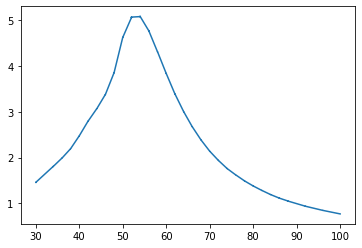

In [4]:
plt.plot(temp, cap)

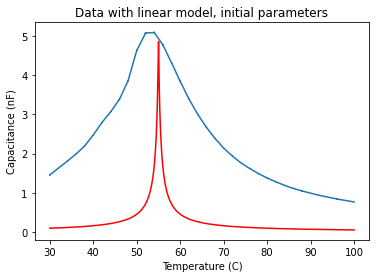

In [5]:
# Define model function
def model(t, cm, k,tc,g):
    return ((cm)/(1 + k*(np.abs((t-tc)))**g))

# Set initial parameters m0 and b0
cmInit = 5
kInit = 2
tcInit = 55
gInit = 1



tt = np.linspace(30, 100, 1000)

# Make the plot
# Recall the order of the arguments in the model definition, model(x, m, b):
plt.plot(tt, model(tt, cmInit, kInit, tcInit, gInit), 'r-')
plt.plot(temp, cap)
#plt.errorbar(temp, cap, yerr=err, fmt='o')
plt.xlabel('Temperature (C)')
plt.ylabel('Capacitance (nF)')
plt.title('Data with linear model, initial parameters')
plt.show()

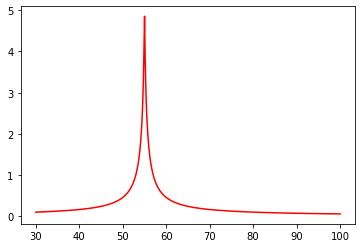

In [6]:
plt.plot(tt, model(tt, cmInit, kInit, tcInit, gInit), 'r-')

In [7]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model, temp, cap, p0=[cmInit, kInit, tcInit, gInit], sigma=err, absolute_sigma=True, maxfev = 50000)
print("optimal =", pOpt)
#print()
#print("pCov =")
#print(pCov)

optimal = [5.25206160e+00 2.89810419e-02 5.36779017e+01 1.40036442e+00]


In [10]:
# Assign results of curve_fit to new variables
cmOpt = pOpt[0]
kOpt = pOpt[1]
tcOpt = pOpt[2]
gOpt = pOpt[3]
cmAlpha = np.sqrt(pCov[0, 0])
kAlpha = np.sqrt(pCov[1, 1])
tcAlpha = np.sqrt(pCov[2,2])
gAlpha = np.sqrt(pCov[3,3])
rho_mb = pCov[0, 1]/(cmAlpha*kAlpha*tcAlpha*gOpt)

print(cmAlpha)
print(kAlpha)
print(tcAlpha)
print(gAlpha)

0.008370878851965077
0.000424920478528752
0.01349829348676749
0.004387846338799376


In [16]:
n = 720                 
err = [0.05] * n     

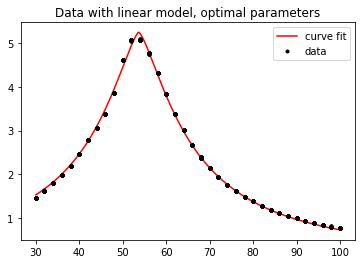

In [25]:
# Plot data with best-fit model
plt.plot(tt, model(tt, cmOpt, kOpt, tcOpt, gOpt),'r-', label = "curve fit")
plt.plot(temp, cap,'k.', label = "data")
plt.legend()
#plt.errorbar(temp, cap, yerr=err, fmt='o')
plt.title('Data with linear model, optimal parameters')
plt.show()

In [26]:
# Compute and display chi-squared
res = cap - model(temp, cmOpt, kOpt, tcOpt, gOpt)
normres = res/err
chisq = np.sum(normres**2)
print("chisq = {0:.1f}".format(chisq)) # Adjust the format specification as appropriate

chisq = 86041.8


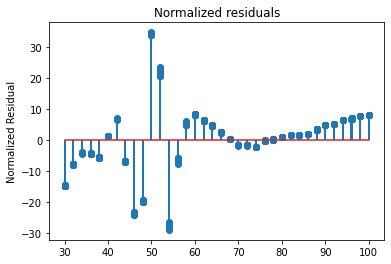

In [27]:
# Show normalized residuals
# Setting use_line_collection=True avoids a warning in Matplotlib 3.1
plt.stem(temp, normres, use_line_collection=True)
plt.ylabel('Normalized Residual')
plt.title('Normalized residuals')
#plt.xlim(0,120)
plt.show()

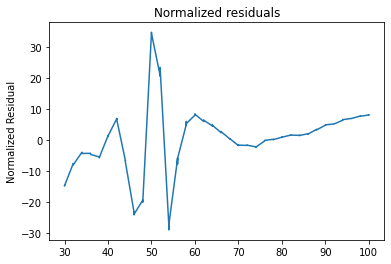

In [28]:
# Show normalized residuals
# Setting use_line_collection=True avoids a warning in Matplotlib 3.1
plt.plot(temp, normres)
plt.ylabel('Normalized Residual')
plt.title('Normalized residuals')
#plt.xlim(0,120)
plt.show()

In [12]:
time1, temp1, cap1 = np.genfromtxt('100to30.lvm', delimiter="\t", unpack=True, skip_header=0)

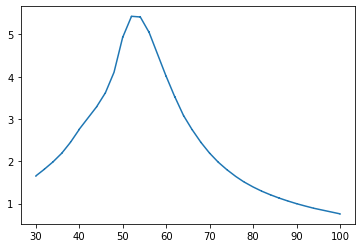

In [13]:
plt.plot(temp1, cap1)

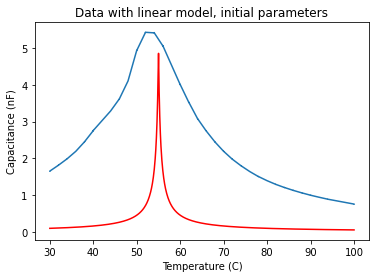

In [14]:
# Define model function
def model(t, cm, k,tc,g):
    return ((cm)/(1 + k*(np.abs((t-tc)))**g))

# Set initial parameters m0 and b0
cmInit = 5
kInit = 2
tcInit = 55
gInit = 1


# Make the plot
# Recall the order of the arguments in the model definition, model(x, m, b):
plt.plot(tt, model(tt, cmInit, kInit, tcInit, gInit), 'r-')
plt.plot(temp1, cap1)
#plt.errorbar(temp, cap, yerr=err, fmt='o')
plt.xlabel('Temperature (C)')
plt.ylabel('Capacitance (nF)')
plt.title('Data with linear model, initial parameters')
plt.show()

In [15]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model, temp1, cap1, p0=[cmInit, kInit, tcInit, gInit], sigma=err, absolute_sigma=True, maxfev = 50000)
print("optimal =", pOpt)
#print()
#print("pCov =")
#print(pCov)

# Assign results of curve_fit to new variables
cmOpt = pOpt[0]
kOpt = pOpt[1]
tcOpt = pOpt[2]
gOpt = pOpt[3]
cmAlpha = np.sqrt(pCov[0, 0])
kAlpha = np.sqrt(pCov[1, 1])
tcAlpha = np.sqrt(pCov[2,2])
gAlpha = np.sqrt(pCov[3,3])
rho_mb = pCov[0, 1]/(cmAlpha*kAlpha*tcAlpha*gOpt)

print(cmAlpha)
print(kAlpha)
print(tcAlpha)
print(gAlpha)

optimal = [5.59706147e+00 2.89855680e-02 5.33539893e+01 1.40724345e+00]
0.008536895590160706
0.00040516466662102635
0.012481472905439278
0.004182502511845781


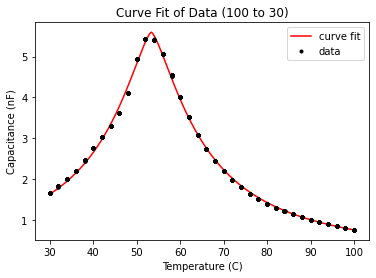

In [19]:
# Plot data with best-fit model
plt.plot(tt, model(tt, cmOpt, kOpt, tcOpt, gOpt),'r-', label = "curve fit")
plt.plot(temp1, cap1, "k.", label = "data")
plt.legend()
#plt.errorbar(temp, cap, yerr=err, fmt='o')
plt.title('Data with linear model, optimal parameters')
plt.title('Curve Fit of Data (100 to 30)')
plt.xlabel('Temperature (C)')
plt.ylabel('Capacitance (nF)')
plt.show()

In [16]:
# Compute and display chi-squared
res = cap - model(temp, cmOpt, kOpt, tcOpt, gOpt)
normres = res/err
chisq = np.sum(normres**2)
print("chisq = {0:.1f}".format(chisq)) # Adjust the format specification as appropriate

chisq = 8783.4


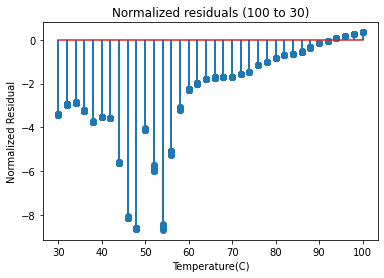

In [18]:
# Show normalized residuals
# Setting use_line_collection=True avoids a warning in Matplotlib 3.1
plt.stem(temp, normres, use_line_collection=True)
plt.ylabel('Normalized Residual')
plt.title('Normalized residuals (100 to 30)')
plt.xlabel("Temperature(C)")
#plt.xlim(0,120)
plt.show()

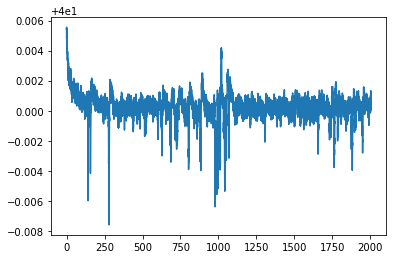

In [49]:
time2, temp2, cap2 = np.genfromtxt('40temp.lvm', delimiter="\t", unpack=True, skip_header=0)
plt.plot(time2,temp2)

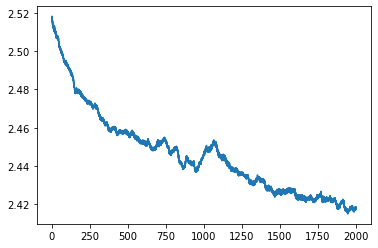

In [37]:
plt.plot(time2,cap2)

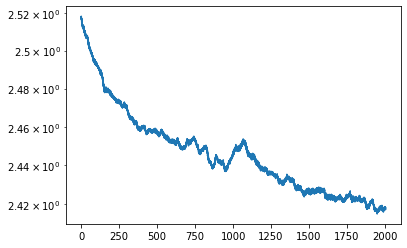

In [41]:
plt.plot(time2,cap2)
plt.yscale("log")

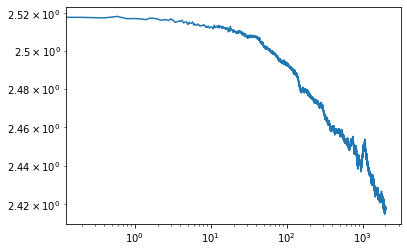

In [39]:
plt.loglog(time2,cap2)

/tmp/ipykernel_72/665923932.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return a*(np.log(tw/t))


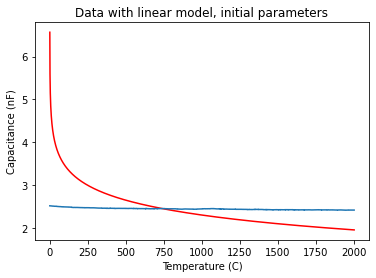

In [88]:
#C(T)=const(log tw/t)

# Define model function
def model(t, a, tw):
    return a*(np.log(tw/t))

# Set initial parameters m0 and b0
aInit = 0.5
twInit = 100000



tt = np.linspace(30, 2000, 1000)

# Make the plot
# Recall the order of the arguments in the model definition, model(x, m, b):
plt.plot(time2, model(time2, aInit, twInit), 'r-')
plt.plot(time2, cap2)
#plt.errorbar(temp, cap, yerr=err, fmt='o')
plt.xlabel('Temperature (C)')
plt.ylabel('Capacitance (nF)')
plt.title('Data with linear model, initial parameters')
#plt.ylim(0,4)
plt.show()




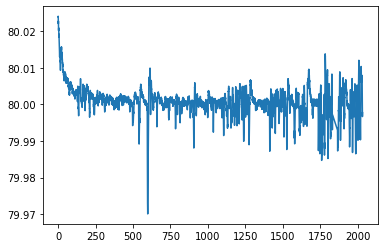

In [36]:
time3, temp3, cap3 = np.genfromtxt('80temp.lvm', delimiter="\t", unpack=True, skip_header=0)
plt.plot(time3,temp3)

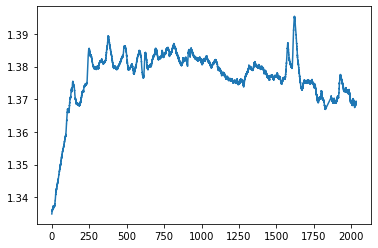

In [45]:
plt.plot(time3,cap3)

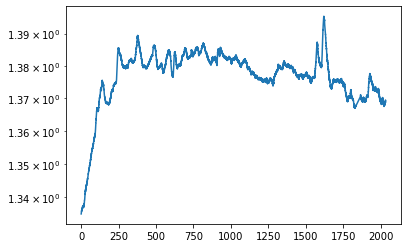

In [42]:
plt.plot(time3,cap3)
plt.yscale("log")

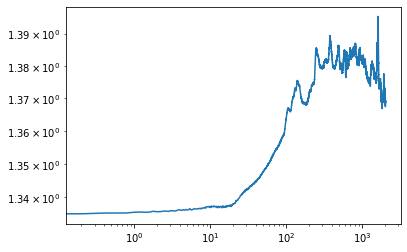

In [40]:
plt.loglog(time3,cap3)